# Setup

Since [Pandas](https://pandas.pydata.org/) is almost a one stop shop for everything data analysis in python anyway, most plotting is done using `df.plot()` syntax, however, you must import [Matplotlib](https://matplotlib.org/index.html) since this is a dependency. I would also recommend installing [Seaborn](https://seaborn.pydata.org/) for more interesting plot types and statistical features. Plus it has a nice native style.

## Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

## Display

Couple options for visualizing in a Jupyter Notebook. Either present static charts `inline`, embed them as interactive elements using `notebook` setting, or open the chart in a new windows using a specified backend (e.g. `GTK3Agg` for raster graphics, `GTK3Cairo` for vector graphics). [ipython source](http://ipython.readthedocs.io/en/stable/interactive/plotting.html) (somewhat out of date), [matplotlib source](https://matplotlib.org/faq/usage_faq.html#what-is-a-backend) BTW, [here](https://matplotlib.org/faq/howto_faq.html#howto-webapp) is info on how to run matplotlib in backend of webserver. 

In [2]:
%matplotlib inline
#%matplotlib notebook
#%matplotlib GTK3Cairo

## Style

Call `plt.style.available` to show options, then set the style of choice.

And customize the style sheet manually using `rcParams`

See more on styling here: https://matplotlib.org/users/customizing.html

In [3]:
plt.style.use('seaborn-white')

In [4]:
mpl.rc('figure')
mpl.rc('savefig', transparent=True, dpi=700, bbox='tight', pad_inches=.05, format='png')

For colors, there are endless presets in matplotlib or seaborn. But, you can always construct your own custom length arrays of hues. A good resource, where you will find the acronyms used widely, is [colorbrewer](http://colorbrewer2.org)

# Data

In [5]:
# generate dummy data for 4 columns, and 5 full years, using month start date
df = pd.DataFrame(data=np.random.rand(12*5,4),
                  index=pd.date_range(start=pd.to_datetime(pd.datetime.now().year-5, format='%Y'), periods=12*5, freq='MS'),
                  columns=['A', 'B', 'C', 'D'])

In [6]:
# generate random categories and assign as categorical column
#categories = np.random.randint(0, 5, size=60)
#df = df.assign(category=pd.Series(categories, dtype='category').values)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2013-01-01 to 2017-12-01
Freq: MS
Data columns (total 4 columns):
A    60 non-null float64
B    60 non-null float64
C    60 non-null float64
D    60 non-null float64
dtypes: float64(4)
memory usage: 2.3 KB


In [8]:
df.describe()

,A,B,C,D
count,60.000000,60.000000,60.000000,60.000000
mean,0.418411,0.494003,0.575195,0.518269
std,0.273138,0.286000,0.317540,0.307686
min,0.002964,0.061219,0.013993,0.004008
25%,0.208326,0.202796,0.282845,0.273211
50%,0.358860,0.529872,0.649487,0.487041
75%,0.575322,0.719909,0.867682,0.803195
max,0.976169,0.978174,0.991965,0.999933


In [9]:
df.head()

,A,B,C,D
2013-01-01,0.881537,0.756529,0.928836,0.833014
2013-02-01,0.913457,0.225545,0.898797,0.508179
2013-03-01,0.329324,0.664742,0.931550,0.896205
2013-04-01,0.970824,0.099125,0.130666,0.438518
2013-05-01,0.498183,0.340908,0.495413,0.644544


In [10]:
df.tail()

,A,B,C,D
2017-08-01,0.325029,0.312903,0.253706,0.680917
2017-09-01,0.976169,0.539315,0.784624,0.137668
2017-10-01,0.325059,0.379847,0.203710,0.823863
2017-11-01,0.104937,0.404438,0.972170,0.321985
2017-12-01,0.146766,0.290193,0.931295,0.923947


## Transform

Group data over time periods. Refer to [Pandas Offset Aliases](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)  

In [11]:
# 1 year periods by year end
df1 = df.groupby(pd.TimeGrouper('1A')).sum()

In [12]:
df1.shape

(5, 4)

In [13]:
# 1 quarter periods by quarter end
df2 = df.groupby(pd.TimeGrouper('1Q')).sum()

In [14]:
df2.shape

(20, 4)

# Visualizations

There are many libraries for visualizing data in Python. Most rely on Matpltlib, however there are some convenience advantages in not using matplotlib.  

For example Matplotlib requires more code to make a simple chart, which can be done via the Pandas and Seaborn API in a single line.

Below are some basics of Pandas, Matplotlib and Seaborn in regards to where each library shines.

## Contents

Pandas Plot Basics:
- [Box Plot](#Box-Plot)

Matplotlib Basics:
- [Multi Line Chart](#Multi-Line-Chart)
- [Stacked Bar Chart](#Stacked-Bar-Chart)

Customizing Matplotlib:
- [Custom Bar Chart](#Custom-Bar-Chart)

Seaborn:
- [Seaborn Histogram](#Seaborn-Histogram)
- [Seaborn Scatterplot](#Seaborn-Scatterplot)
- [Seaborn Heatmap](#Seaborn-Heatmap)

## Pandas Plot Basics

### BoxPlot

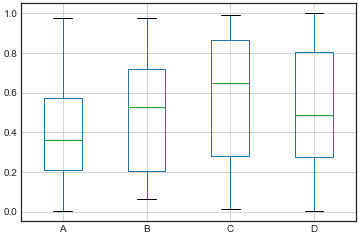

In [15]:
df.boxplot()

## Matplotlib Basics

### Multi Line Chart

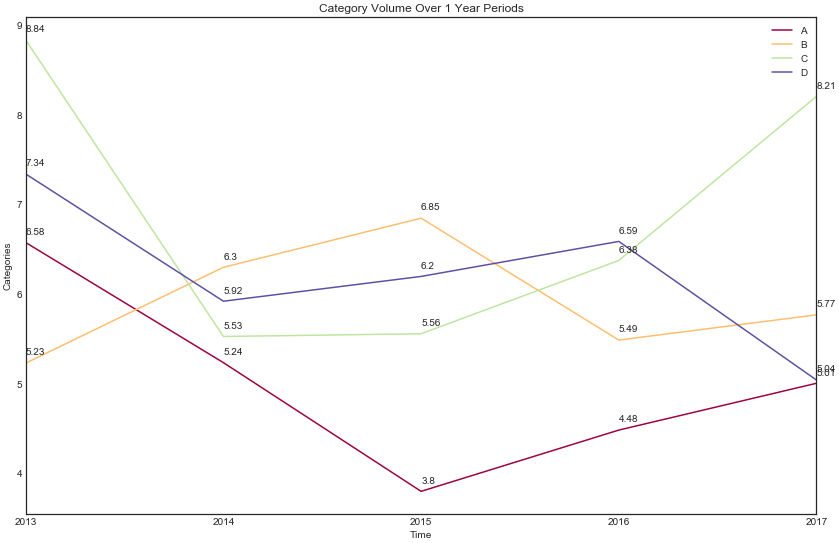

In [16]:
fig, ax = plt.subplots(figsize=(12,8))

df1.plot(ax=ax, colormap='Spectral')

ax.set(ylabel='Categories', xlabel='Time', title='Category Volume Over 1 Year Periods')

# annotate data labels onto series lines
for series in df1.columns:
    for x,y in zip(df1.index, df1[series]):
        ax.annotate(str(round(y,2)), xy=(x,y+(.01*df1.values.max())))

fig.tight_layout(pad=2)

fig.savefig('img/category_volume_over_time_multi_line_chart.png')

### Stacked Bar Chart

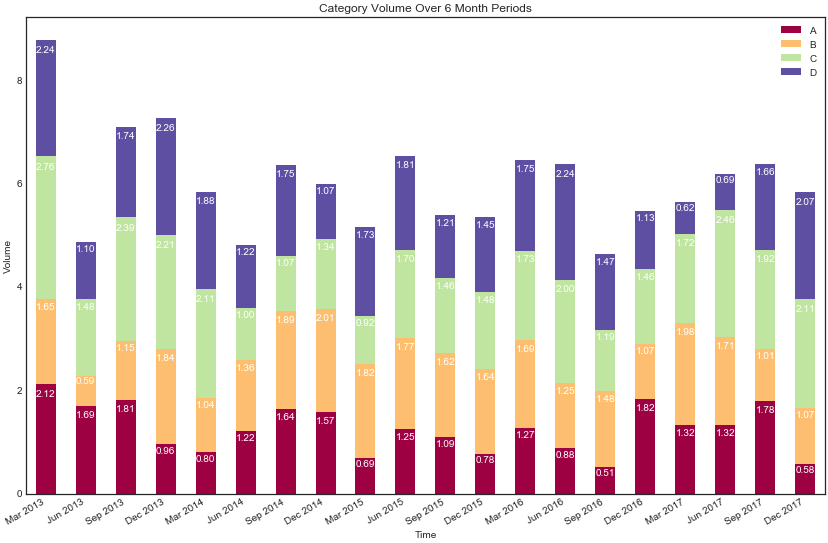

In [17]:
fig, ax = plt.subplots(figsize=(12,8))

df2.plot(kind='bar', stacked=True, ax=ax, colormap='Spectral')

ax.set(ylabel='Volume', xlabel='Time', title='Category Volume Over 6 Month Periods')

# auto format xaxis labels as date
fig.autofmt_xdate()

# custom format xaxis date labels
ax.xaxis.set_major_formatter(plt.FixedFormatter(df2.index.to_series().dt.strftime('%b %Y')))

# annotate data labels onto vertical bars
for bar,(col,ix) in zip(ax.patches, pd.MultiIndex.from_product([df2.columns,df2.index])):
    label = '{:,.2f}'.format(df2.loc[ix,col])
    stack = df2.iloc[df2.index.get_loc(ix),:df2.columns.get_loc(col)].sum() if len(df2.iloc[df2.index.get_loc(ix),:df2.columns.get_loc(col)]) > 0 else 0
    ax.text(s=label, x=bar.get_x()+(bar.get_width()/2), y=stack+bar.get_height()-(.05*bar.get_height()), ha='center', va='top', fontdict={'fontsize':10, 'color':'white'})

fig.tight_layout(pad=2)

fig.savefig('img/category_volume_over_time_stacked_bar_chart.png')

## Advanced Matplotlib

### Custom Bar Chart

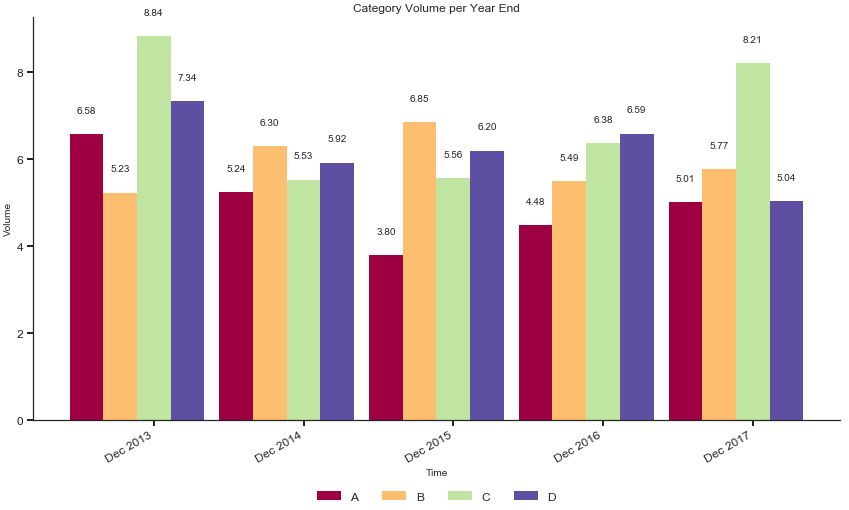

In [18]:
fig, ax = plt.subplots(figsize=(12,8))

series = len(df1.columns)
groups = len(df1.index)
bars = series * groups
width = .90 / series
bar_offset = series * width / 2

# bars
for i,(col,values) in enumerate(df1.iteritems()):
    s = df1.columns.get_loc(col) + 1
    rect = ax.bar(np.arange(groups)+(s*width)-bar_offset, list(values), width=width, 
                  color=mpl.colors.rgb2hex(mpl.cm.get_cmap('Spectral',series)(i)[:3]))

# ticks
ax.set_xticks(np.arange(groups)+width)
ax.set_xticklabels(df1.index.strftime('%b %Y'))
ax.tick_params(axis='both', which='both', direction='out', length=6, width=2,
               left='on', right='off', top='off', bottom='on',
               labelsize=12)

# auto format xaxis labels as date
fig.autofmt_xdate()

ax.set(ylabel='Volume', xlabel='Time', title='Category Volume per Year End')

# labels
for bar,(col,ix) in zip(ax.patches, pd.MultiIndex.from_product([df1.columns,df1.index])):
    label = '{:,.2f}'.format(df1.loc[ix,col])
    ax.text(s=label, x=bar.get_x()+(bar.get_width()/2), y=bar.get_height()+(.05*df1.values.max()), ha='center', va='bottom', fontdict={'fontsize':10})

# legend
handles, labels = ax.containers, list(df1.columns)
lgd = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize=12, frameon=False)
# centered on top
#lgd = ax.legend(handles, labels, loc='lower center', bbox_to_anchor=(0,1.02,1,0.2), ncol=4, fontsize=12, frameon=False)

# remove right and left figure border
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = plt.gcf()
fig.tight_layout()
fig.subplots_adjust(top=.9, bottom=.2)

fig.savefig('img/category_volume_per_year_end_custom.png')

## Seaborn

### Seaborn Histogram

In [19]:
df.A.value_counts(bins=10)

(0.295, 0.392]    10
(0.1, 0.198]      10
(0.392, 0.49]      8
(0.879, 0.976]     7
(0.198, 0.295]     7
(0.49, 0.587]      6
(0.00099, 0.1]     5
(0.587, 0.684]     4
(0.782, 0.879]     3
(0.684, 0.782]     0
Name: A, dtype: int64

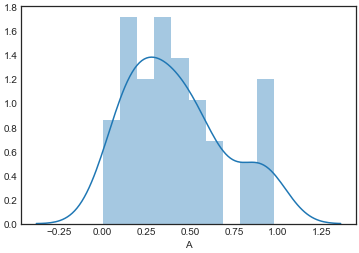

In [20]:
ax = sns.distplot(df.A, bins=10)

### Seaborn Scatterplot

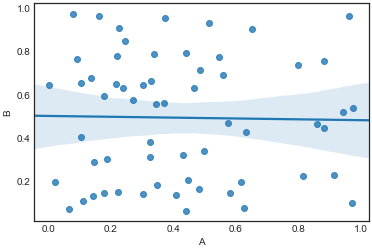

In [21]:
ax = sns.regplot(x="A", y="B", data=df)

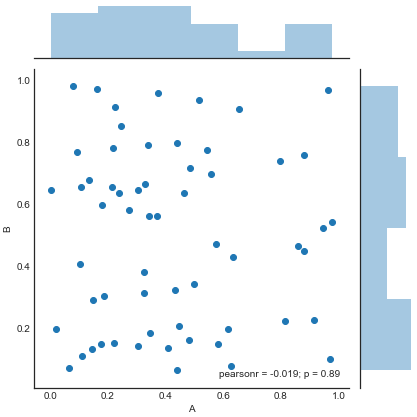

In [22]:
plot = sns.jointplot(df.A, df.B, kind='scatter')

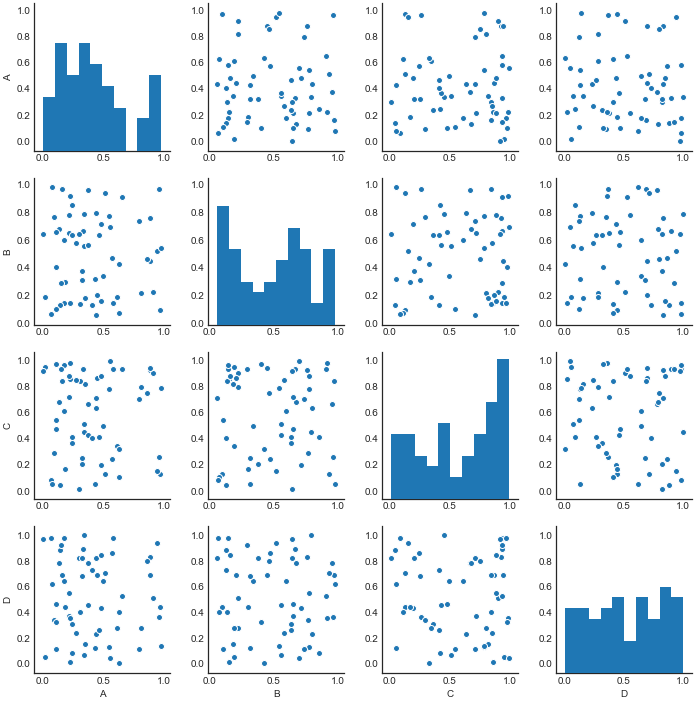

In [23]:
plot = sns.pairplot(df)

### Seaborn Heatmap

In [24]:
df.corr()

,A,B,C,D
A,1.000000,-0.018774,-0.001369,-0.067008
B,-0.018774,1.000000,0.013489,-0.062994
C,-0.001369,0.013489,1.000000,-0.050238
D,-0.067008,-0.062994,-0.050238,1.000000


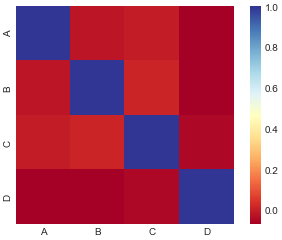

In [25]:
ax = sns.heatmap(df.corr(), square=True, cmap='RdYlBu')

# Resources

- [Matplotlib docs](https://matplotlib.org/contents.html)  
- [Pandas Visualization docs](https://pandas.pydata.org/pandas-docs/stable/visualization.html)  
- [Seaborn docs](https://seaborn.pydata.org/api.html) and [Seaborn Tutorials](https://seaborn.pydata.org/tutorial.html#tutorial)  

Chris Moffitt at Practical Business Python has a [great tutorial and helpful infographic](http://pbpython.com/effective-matplotlib.html) on matplotlib  
